## 1. 필요한 패키지 및 데이터 불러오기

In [1]:
import pandas as pd #파일불러올 떄
import numpy as np
import matplotlib as mpl #시각화
import matplotlib.pyplot as plt
import seaborn as sns #boxplot등 그래프 그릴 때 필요함
import os #디렉토리
from scipy import stats

import missingno as msno #결측치 확인할 수 있는 패키지
plt.style.use('seaborn')

import warnings #경고 무시하기
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus'] = False #마이너스 폰트가 깨지는 것을 방지

%matplotlib inline

# 기본적인 모듈을 import 합니다. 
# mlp.rcParams['axes.unicode_minus'] = False 코드는 그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처입니다.

In [2]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [3]:
df=pd.read_csv('/content/drive/Shareddrives/빅데이터/BeforeCorona/data/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2019.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644273 entries, 0 to 644272
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   운행일자     644273 non-null  int64  
 1   운행요일     644273 non-null  object 
 2   구분       644273 non-null  object 
 3   출발시간대    644267 non-null  float64
 4   성별       533238 non-null  object 
 5   연령대      644273 non-null  object 
 6   고객등급_현재  533238 non-null  object 
 7   출발역코드    644273 non-null  int64  
 8   출발역명     644273 non-null  object 
 9   도착역코드    644273 non-null  int64  
 10  도착역명     644273 non-null  object 
 11  상하행구분    644273 non-null  object 
 12  노선       644273 non-null  int64  
 13  역무열차종코드  644273 non-null  int64  
 14  역무열차종    644273 non-null  object 
 15  인원       644273 non-null  int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 78.6+ MB


In [9]:
df.head()

,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
0,20190301,금,비회원,0.0,NaN,기타,NaN,3900248,전주,3900211,익산,U,943,2,무궁화호,12
1,20190301,금,비회원,0.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,4
2,20190301,금,비회원,0.0,NaN,기타,NaN,3900248,전주,3900279,여수엑스포,D,1040,2,무궁화호,1
3,20190301,금,비회원,2.0,NaN,기타,NaN,3900248,전주,3900276,여천,D,1040,2,무궁화호,3
4,20190301,금,비회원,2.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,4


## 2. 도착역 강릉, 목포, 전주만 추출

In [13]:
gg=df[df['도착역명']=='강릉']
mm=df[df['도착역명']=='목포']
jj=df[df['도착역명']=='전주']
df=pd.concat([gg,mm,jj], ignore_index=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321153 entries, 0 to 321152
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   운행일자     321153 non-null  int64  
 1   운행요일     321153 non-null  object 
 2   구분       321153 non-null  object 
 3   출발시간대    321152 non-null  float64
 4   성별       265591 non-null  object 
 5   연령대      321153 non-null  object 
 6   고객등급_현재  265591 non-null  object 
 7   출발역코드    321153 non-null  int64  
 8   출발역명     321153 non-null  object 
 9   도착역코드    321153 non-null  int64  
 10  도착역명     321153 non-null  object 
 11  상하행구분    321153 non-null  object 
 12  노선       321153 non-null  int64  
 13  역무열차종코드  321153 non-null  int64  
 14  역무열차종    321153 non-null  object 
 15  인원       321153 non-null  int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 39.2+ MB


## 3. 분석

### 1) 운행요일별 이용객 수

In [18]:
df1=df.groupby(['도착역명','운행요일'])['인원'].agg(**{'인원':'sum'}).reset_index()
print(df1)

   도착역명 운행요일     인원
0    강릉    금  78674
1    강릉    목  39817
2    강릉    수  35072
3    강릉    월  44746
4    강릉    일  72199
5    강릉    토  95125
6    강릉    화  36697
7    목포    금  44314
8    목포    목  24689
9    목포    수  21905
10   목포    월  25714
11   목포    일  37970
12   목포    토  44845
13   목포    화  22543
14   전주    금  72778
15   전주    목  42007
16   전주    수  38650
17   전주    월  42762
18   전주    일  68146
19   전주    토  85354
20   전주    화  37669


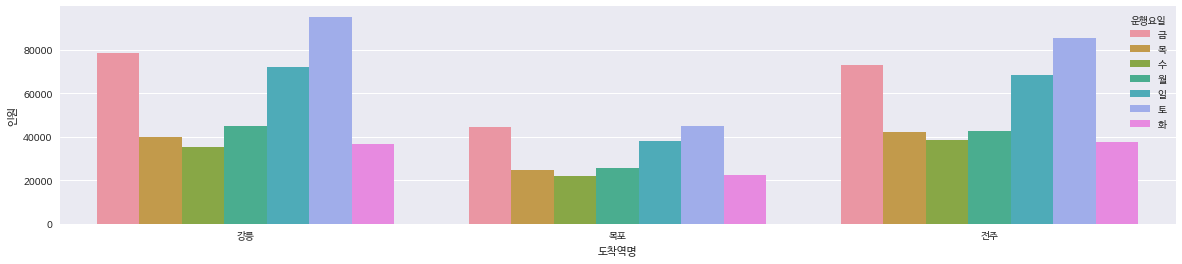

In [20]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df1, y = "인원", x = "도착역명", hue="운행요일")

- 세 지역 모두 금요일과 토요일의 이용객수가 가장 많았다

### 2) 성별별 이용객수

In [21]:
df2=df.groupby(['도착역명','성별'])['인원'].agg(**{'인원':'sum'}).reset_index()
print(df2)

  도착역명 성별      인원
0   강릉  *     463
1   강릉  F  178516
2   강릉  M  139227
3   목포  *     211
4   목포  F   68091
5   목포  M   77746
6   전주  *     193
7   전주  F  144620
8   전주  M  127583


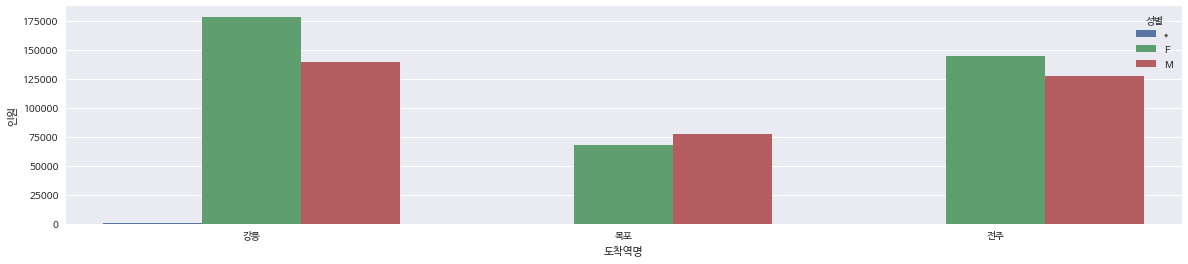

In [22]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df2, y = "인원", x = "도착역명", hue="성별")

- 강릉, 전주 지역은 여성이용객수가, 목포지역은 남성이용객수가 많았다.

In [64]:
df3=df.groupby(['도착역명','연령대'])['인원'].agg(**{'인원':'sum'}).reset_index()
print(df3)

   도착역명     연령대      인원
0    강릉   0-19세    9771
1    강릉  20-29세   98565
2    강릉  30-39세   74075
3    강릉  40-49세   66909
4    강릉  50-59세   44490
5    강릉  60-64세   12539
6    강릉   65세이상   11820
7    강릉      기타   84161
8    목포   0-19세    4252
9    목포  20-29세   33983
10   목포  30-39세   35057
11   목포  40-49세   35042
12   목포  50-59세   24580
13   목포  60-64세    6333
14   목포   65세이상    6755
15   목포      기타   75978
16   전주   0-19세    9630
17   전주  20-29세   84999
18   전주  30-39세   67901
19   전주  40-49세   57832
20   전주  50-59세   36572
21   전주  60-64세    8029
22   전주   65세이상    7391
23   전주      기타  115012


### 3) 연령대별 이용객수

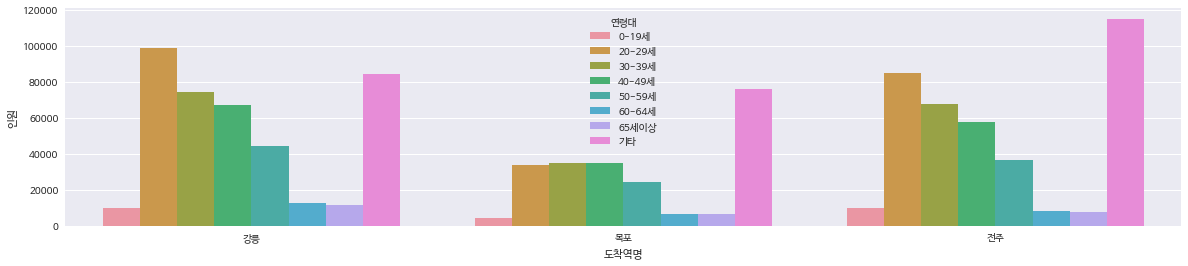

In [65]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df3, y = "인원", x = "도착역명", hue="연령대")

- 값이 나와있는 연령대 중에는 20~29세가 가장 많았다

### 4) 역무열차종별 이용객수

In [66]:
df4=df.groupby(['도착역명','역무열차종'])['인원'].agg(**{'인원':'sum'}).reset_index()
print(df4)

   도착역명    역무열차종      인원
0    강릉   KTX-호남  367854
1    강릉     무궁화호   34476
2    목포  ITX-새마을    6541
3    목포      KTX   98231
4    목포   KTX-산천   75433
5    목포   KTX-호남    2300
6    목포     무궁화호   39475
7    전주  ITX-새마을   18775
8    전주      KTX  121130
9    전주   KTX-산천  103898
10   전주     무궁화호  138866
11   전주     새마을호    4697


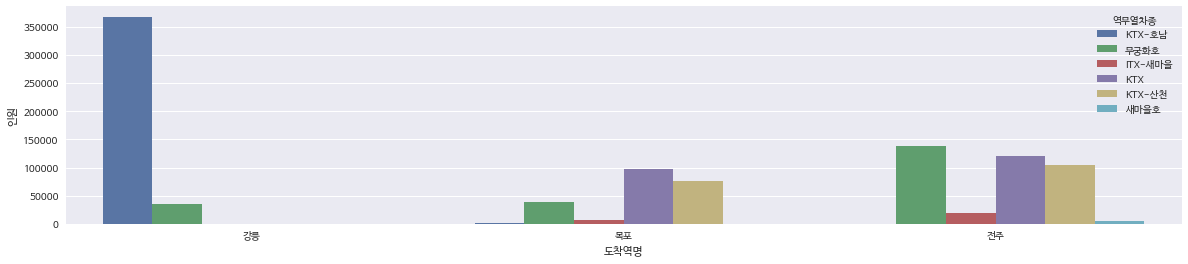

In [67]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df4, y = "인원", x = "도착역명", hue="역무열차종")

### 5) 회원유무별 이용객수

In [68]:
df5=df.groupby(['도착역명','구분'])['인원'].agg(**{'인원':'sum'}).reset_index()
print(df5)

  도착역명   구분      인원
0   강릉  비회원   84124
1   강릉   회원  318206
2   목포  비회원   75932
3   목포   회원  146048
4   전주  비회원  114970
5   전주   회원  272396


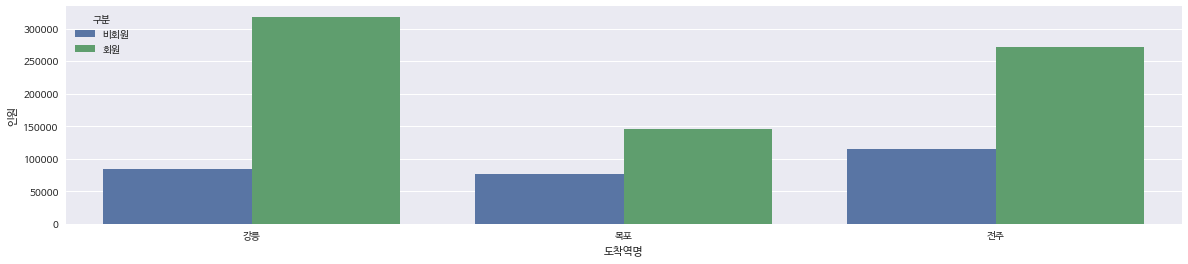

In [69]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df5, y = "인원", x = "도착역명", hue="구분")

- 비회원보다 회원의 이용객수가 월등히 많았다.

### 6) 월별 이용객수

In [71]:
df['운행일자']=df['운행일자'].astype(str)
df = df.assign(year = df['운행일자'].str.slice(0, 4) )
df = df.assign(month = df['운행일자'].str.slice(4, 6) )

In [72]:
df.head()

,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원,year,month
0,20190301,금,비회원,0.0,NaN,기타,NaN,3900085,김천,3900587,강릉,U,1967,2,무궁화호,1,2019,03
1,20190301,금,비회원,0.0,NaN,기타,NaN,3900095,대구,3900587,강릉,U,1967,2,무궁화호,1,2019,03
2,20190301,금,비회원,0.0,NaN,기타,NaN,3900142,구원주,3900587,강릉,D,1963,2,무궁화호,2,2019,03
3,20190301,금,비회원,1.0,NaN,기타,NaN,3900153,제천,3900587,강릉,D,1963,2,무궁화호,2,2019,03
4,20190301,금,비회원,1.0,NaN,기타,NaN,3900513,점촌,3900587,강릉,U,1967,2,무궁화호,8,2019,03


In [73]:
df6=df.groupby(['도착역명','month'])['인원'].agg(**{'인원':'sum'}).reset_index()
print(df6)

  도착역명 month      인원
0   강릉    03  120943
1   강릉    04  123853
2   강릉    05  157534
3   목포    03   71206
4   목포    04   72202
5   목포    05   78572
6   전주    03  124379
7   전주    04  120643
8   전주    05  142344


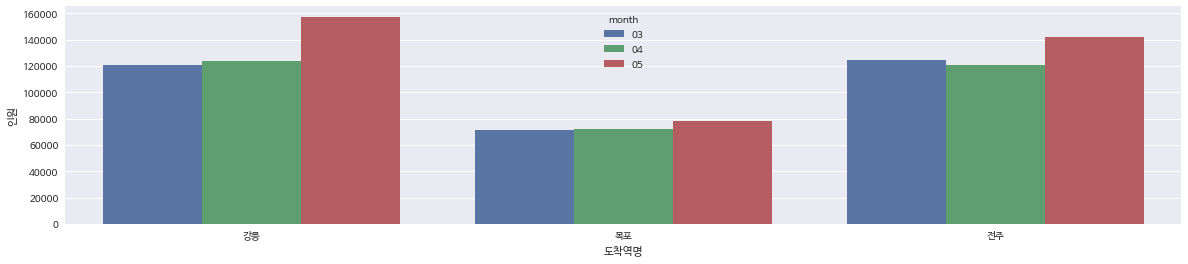

In [75]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df6, y = "인원", x = "도착역명", hue="month")

- 3, 4, 5월 중 5월의 이용객수가 많았다.

### 7) 출발역별 이용객수(파이차트 고려)

In [77]:
df7=df.groupby(['도착역명','출발역명'])['인원'].agg(**{'인원':'sum'}).reset_index()
print(df7)

    도착역명  출발역명     인원
0     강릉    경산     11
1     강릉    경주    141
2     강릉    고한    850
3     강릉    구미     38
4     강릉   구안동    491
..   ...   ...    ...
168   전주    천안   3468
169   전주  천안아산  10275
170   전주    평택   4265
171   전주    함열    658
172   전주    행신   3897

[173 rows x 3 columns]


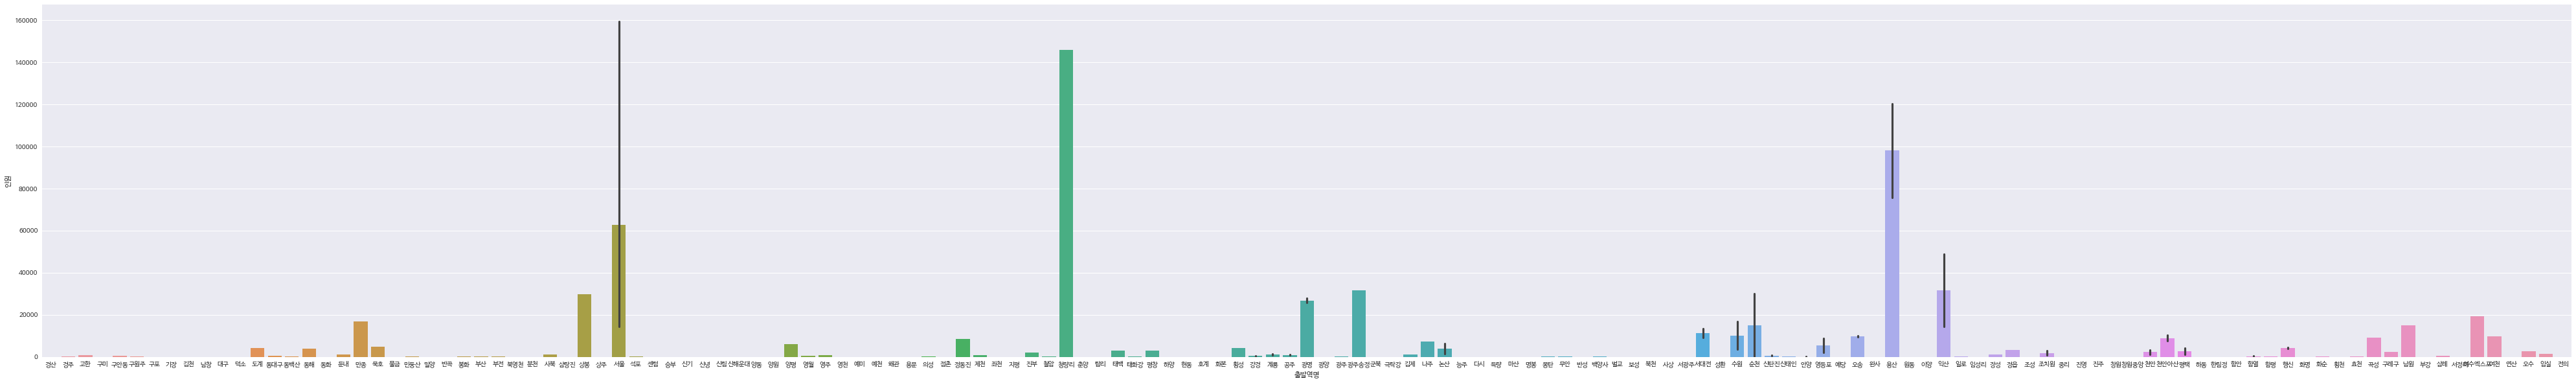

In [88]:
fig, ax = plt.subplots(figsize = (70, 10))
sns.barplot(data = df7, y = "인원", x = "출발역명")

- 서울, 청량리, 광명, 광주, 용산